In [1]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, BasicAer
from IPython.core.display import Image, display
simulator = Aer.get_backend('qasm_simulator')


- References
1. https://www.youtube.com/watch?v=pMCqD9WSYwQ&feature=youtu.be&ab_channel=Dr.KittyYeung
2. https://www.youtube.com/watch?v=HAV17aVqufQ&ab_channel=AnantVigyan
3. https://hackaday.io/project/168554/files
4. https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm
5. https://www.youtube.com/watch?v=fbntwz3RlbU&ab_channel=QuantumComputing

<h1 align="center">
<span style="color: blue;">$\textbf{Quantum Oracles}$</center>
</h1>

<span style="color: blue;">Quantum Oracle is a black box used extensively in quantum algorithms for
the estimation of functions using qubits. Estimation in a classical computer is set up with an $n$ -dimensional input $x$ producing an $m$ -dimensional output $f(x)$

$$
f:\{0,1\}^{n} \rightarrow\{0,1\}^{m}
$$

The $n$ -dimensional vector $x$ is encoded as quantum information by
considering $n$ qubits each storing a single bit of information as below

$$
|x\rangle=\left|x_{0}\right\rangle \otimes\left|x_{1}\right\rangle \otimes \cdots \otimes\left|x_{n-1}\right\rangle
$$

Quantum oracles help transform a system from a quantum state $|x\rangle$ into a state $|f(x)\rangle,$ through the evolution of quantum states.

<img src="./figures/Oracle.jpg" alt="drawing" width="600"/>


<h1 align="center">
<span style="color: red;">$\textbf{Deutsch's Algorithm}$</center>
</h1>



In the Deutsch algorithm, we are solving a problem with two qubits. The problem can be described in this way.

- Alice and Bob live in different cities and they are playing a game.
- Alice prepares her qubits and sends them to Bob. 
- Bob applies a function on Alice's qubits and sends them back to Alice.
- Bob is allowed to choose only one of the 4 possible functions, that are either constant ($f(0) = f(1)$) or balanced ($f(0) \ne f(1)$), and input and output of the function is one bit ($0$ or $1$).
- Alice should find out from the measurement result was the chosen function balanced or constant. In the course of this algorithm, we will use the concept of quantum parallelism. Here is the circuit for the algorithm.

<img src="./figures/Deutsch.png" alt="drawing" width="500"/>

where $\left| x \right\rangle$ is the input register with one qubit, $\left| y \right\rangle$ is the output register also with one qubit, $M$ denotes the measurement. 
    
1. The initial state is $\left| \psi_0 \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle$. 

2. Alice applies Hadamard gates on both input and output registers and obtains the $\left| \psi_1 \right\rangle$ state:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right).
$$

- Then Alice sends the qubits to Bob. 


3. Now Bob should make a decision which $f(x)$ function to use. 4 possible functions can be chosen.
- Two of them are constant functions ($f(0) = f(1) = 0$ or $f(0) = f(1) = 1$) and the other two are balanced ($f(0) = 0$ and $f(1) = 1$ or $f(0) = 1$ and $f(1) = 0$). 
- After choosing one of them Bob acts the corresponding $U_{f(x)}$ circuit on the qubits. The result of the function is stored in the output register by mmodulo 2 addition $\left| y \oplus f(x)\right\rangle$. Let's rewrite the $\left| \psi_1 \right\rangle$ in this way:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
$$

After applying the circuit $U_{f(x)}$ one will obtain $\left| \psi_2 \right\rangle$ state that Bob will send back to Alice:

\begin{align*}
\left| \psi_2 \right\rangle = \frac{1}{2} 
\big( \left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + 
\left| 1 \right\rangle \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \big)
\end{align*}

How one can see the $f(0)$ and $f(1)$ were calculated at the same time by executing the circuit once (quantum parallelism). Also, note that $|\psi_2 \rangle$ is an example of an entangled state. Although the values $of(0)$ and $f(1)$ are computed, but they are "hidden" in the quantum state. By saying "hidden" means that we don't know a direct way to extract the values from them efficiently. 

 Now Bob sends the qubits back to Alice. 

4. Alice applies Hadamard gate on the input qubit and obtains the final $\left| \psi_3 \right\rangle$ quantum state before the measurement:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( &\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + 
\\+ &\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \big)
\end{align*}

Let's regroup superposition states:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle  + \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle - \left| 0 \oplus f(1) \right\rangle +  \left| 1 \oplus f(1) \right\rangle \right) 
\big)
\end{align*}

Here we are going to show that, when the function was balanced the terms in the first bracket cancel each other and final state of the first qubit becomes $\left| 1 \right\rangle$. Otherwise, if the function was constant the terms of the second bracket cancel each other and the final state of the first qubit will be $\left| 0 \right\rangle$. So, by just measuring the first qubit, Alice can understand was the function balanced or constant. To see this let's consider one of the examples. Suppose Bob has chosen a balanced function for which $f(0) = 0$ and $f(1) = 1$. In that case:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle  + \left| 0 \oplus 1 \right\rangle - \left| 1 \oplus 1 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle - \left| 0 \oplus 1 \right\rangle +  \left| 1 \oplus 1 \right\rangle \right) 
\big)
\end{align*}

Note that $\left|1 \oplus 1\right\rangle = \left|0\right\rangle$. $\left|0 \oplus 1\right\rangle = \left|1\right\rangle$, $\left|1 \oplus 0\right\rangle = \left|1\right\rangle$ and $\left|0 \oplus 0\right\rangle = \left|0\right\rangle$. So:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle  + \left| 1 \right\rangle - \left| 0 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle - \left| 1 \right\rangle +  \left| 0 \right\rangle \right) 
\big) =
\\
& = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

Similar calculations can be done for other functions:

\begin{align*}
&\text{f(0) = 0, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 0, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

One can see that if the function is constant (the first two cases) the qubit in the input register is in the $\left| 0 \right\rangle$ state and if the function is balanced (the last two cases) the qubit is in the $\left| 1 \right\rangle$ state.

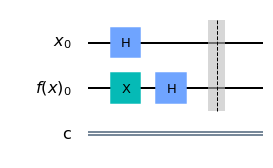

In [2]:
# Alice prepares the qubits
input_register = QuantumRegister(1, "x")
output_register = QuantumRegister(1, "f(x)")
classical_register = ClassicalRegister(1, "c")

circuit_Deutsch = QuantumCircuit(input_register, output_register, classical_register)

# Prepare the qubit in the output register in the |1> state
circuit_Deutsch.x(output_register[0])

# Hadamard gates applied on input and output registers
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.h(output_register[0])

# Add a barrier
circuit_Deutsch.barrier()

# Draw the circuit
circuit_Deutsch.draw(output="mpl")

Now Alice sends to Bob the qubits and Bob should choose one of the four functions

In [3]:
# Bob's four functions/circuits

# The first option: constant f(0) = f(1) = 0
circuit_Bob1 = QuantumCircuit(input_register, output_register)
circuit_Bob1.barrier()

# The second option: constant f(0) = f(1) = 1
circuit_Bob2 = QuantumCircuit(input_register, output_register)
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.barrier()

# The third option: balanced f(0) = 0 & f(1) = 1
circuit_Bob3 = QuantumCircuit(input_register, output_register)
circuit_Bob3.cx(input_register[0], output_register)
circuit_Bob3.barrier()

# The fourth option: balanced f(0) = 1 & f(1) = 0
circuit_Bob4 = QuantumCircuit(input_register, output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.cx(input_register[0], output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.barrier()

Now Bob will choose randomly which circuit to implement. Note that for Alice the applied circuit will be unknown: for her, it is a black box.

The circuit with Bob's chosen function


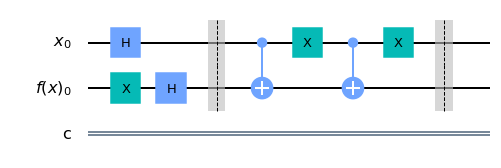

In [4]:
import random
list_options_Bob = [circuit_Bob2,circuit_Bob2, circuit_Bob3, circuit_Bob4]
circuit_Bob_choice = random.choice(list_options_Bob)

# Add the chosen circuit to the main circuit
circuit_Deutsch += circuit_Bob_choice

# Draw the circuit 
print("The circuit with Bob's chosen function")
circuit_Deutsch.draw(output="mpl")

After applying the chosen function/circuit, Bob sends back the qubits to Alice.

The final version of the circuit


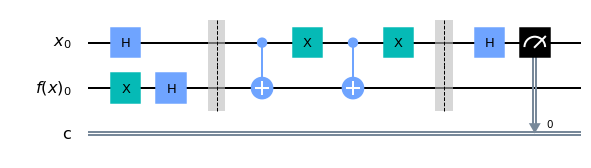

In [5]:
# Alice's final operations
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.measure(input_register[0], classical_register[0])

# Draw the final version of the circuit 
print("The final version of the circuit")
circuit_Deutsch.draw(output="mpl")

In [6]:
# The execution of the circuit
counts = execute(circuit_Deutsch, simulator, shots=1).result().get_counts()

# Finding the only key/measurement outcome
measurement_result = list(counts.keys())[0]
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# From the final measurement result, Alice understands if 
# the Bob's chosen function balanced or constant
if measurement_result == '0':
    print("Bob's chosen function was constant")
elif measurement_result == '1':
    print("Bob's chosen function was balanced")

The results of the measurements: {'0': 1}
The final result is: 0
Bob's chosen function was constant


<h1 align="center">
<span style="color: red;">$\textbf{Deutsch-Jozsa Algorithm}$</center>
</h1>

<span style="color: blue;">Deutsch’s algorithm was the first to demonstrate a clear advantage of quantum over classical computing.Deutsch-Jozsa algorithm is the $n$ qubit version of the Deutsch algorithm.The functions now take $n$ bit strings (e.g. "0101011") as an input and return one bit output ($0$ or $1$). Bob still is allowed only to use either balanced or constant functions and Alice should find out the property of that function.

Let's begin with an example. Suppose I buy two standard decks of 52 playing cards. In a separate room where you cannot see me, I create a single deck of 52 cards where one of the following is true:
1. All the cards are red or all the cards are black.
2. Half the cards (26) are black and half are red.

<span style="color: red;">The first option is called "constant" and the second is "balanced."

<img src="./figures/function.jpeg" alt="drawing" width="600"/>

I now go to you and give you the problem of finding out which of the two possibilities is the case for the deck I am holding. You do so by looking at and then discarding the card at the top of the deck.

In the best case, the first card is one color and the second is the other. Therefore the deck is balanced. In the worst case you must examine $27=1+52 / 2$ cards. The first 26 cards might be black, say. If the next is black, then all are black. If it is red, the deck is balanced.

Regarding an oracle, we are asking "is the card at the top of the deck black?". It returns 1 if it is, 0 if it is red. As I stated, we must consult the oracle 27 times in the worst case to get the
correct answer.

<img src="./figures/Deutsch_jozsa.png" alt="drawing" width="600"/>

The main steps of the algorithm are presented in the following circuit:
1. The algorithm begins with the $n+1$ bit state $|0\rangle^{\otimes n}|1\rangle.$ That is, the first n bits are each in the state $|0\rangle$ and the final bit is $|1\rangle .$ A Hadamard transform is applied to each bit to obtain the state

$$
\left| \psi_1 \right\rangle =\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|0\rangle-|1\rangle)
$$

2. We have the function $f$ implemented as a quantum oracle. The oracle maps the state $|x\rangle|y\rangle$ to $|x\rangle|y \oplus f(x)\rangle,$ where $\oplus$ is addition modulo 2. Applying the quantum oracle gives

$$
\left| \psi_2 \right\rangle =
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|f(x)\rangle-|1 \oplus f(x)\rangle)
$$

- For each $x, f(x)$ is either 0 or 1 . Testing these two possibilities, we see the above state is equate

$$
\left| \psi_2 \right\rangle =
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle(|0\rangle-|1\rangle)
$$

- At this point the last qubit $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ may be ignored and therefore below is remained:

$$
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle
$$

3. We apply a Hadamard transform to each qubit to obtain

$$
\left| \psi_3 \right\rangle =
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\left[\frac{1}{\sqrt{2^{n}}} \sum_{y=0}^{2^{n}-1}(-1)^{x \cdot y}|y\rangle\right]=\frac{1}{2^{n}} \sum_{y=0}^{2^{n}-1}\left[\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}(-1)^{x \cdot y}\right]|y\rangle
$$

where $x \cdot y=x_{0} y_{0} \oplus x_{1} y_{1} \oplus \cdots \oplus x_{n-1} y_{n-1}$ is the sum of the bitwise product.
4. Finally we examine the probability of measuring $|0\rangle^{\otimes n}$

$$
\left|\frac{1}{2^{n}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\right|^{2}
$$

which evaluates to 1 if $f(x)$ is constant (constructive interference) and 0 if $f(x)$ is balanced (destructive interference). In other words, the final measurement will be $|0\rangle^{\otimes n}$ (i.e. all zeros) if $f(x)$ is constant and will yield some other states if $f(x)$ is balanced.

<img src="./figures/overall dj.jpg" alt="drawing" width="600"/>

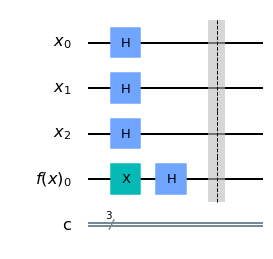

In [7]:
# Alice: qubit preparation
input_register = QuantumRegister(3, "x")
output_register = QuantumRegister(1, "f(x)")
classical_register = ClassicalRegister(3, "c")

circuit_Deutsch_Jozsa = QuantumCircuit(input_register, output_register, classical_register)

# Prepare the qubit in the output register in the |1> state
circuit_Deutsch_Jozsa.x(output_register[0])

# Hadamard gates on both input and output registers
circuit_Deutsch_Jozsa.h(input_register) # Hadamard gate is applied to all qubits in the input_register
circuit_Deutsch_Jozsa.h(output_register[0])

# Add a barrier
circuit_Deutsch_Jozsa.barrier()
circuit_Deutsch_Jozsa.draw('mpl')


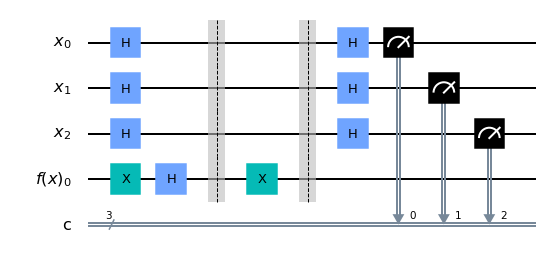

In [8]:
# Circuit for the constant function
circtuit_Deutsch_Jozsa_constant  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_constant += circuit_Deutsch_Jozsa

# Implementing the f(x) = 1 constant function
circtuit_Deutsch_Jozsa_constant.x(output_register[0])

# Add a barrier
circtuit_Deutsch_Jozsa_constant.barrier()

# Final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_constant.h(input_register)

# Measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_constant.measure(input_register, classical_register)

# Draw the circuit
circtuit_Deutsch_Jozsa_constant.draw(output="mpl")

In [9]:
# A function that will help Alice to define if
# the chosen function was balanced or constant 
def is_balanced_or_constant(circuit, bakend):
    # The execution of the circuit
    counts = execute(circuit, bakend, shots=1).result().get_counts()

    # Finding the only key/measurement outcome
    measurement_result = list(counts.keys())[0]
    print("The results of the measurements: {}".format(counts))
    print("The final result is: {}".format(measurement_result))

    # Alice checks if Bob's function was constant or balanced
    if '000' in counts:
        print("Bob's chosen function was constant")
    else:
        print("Bob's chosen function was balanced")

In [10]:
# Alice uses is_balanced_or_constant() function
is_balanced_or_constant(circtuit_Deutsch_Jozsa_constant, simulator)

The results of the measurements: {'000': 1}
The final result is: 000
Bob's chosen function was constant


Now we will do the same calculations but for a balanced $f(x)$ function that we have used in the quantum parallelism chapter.

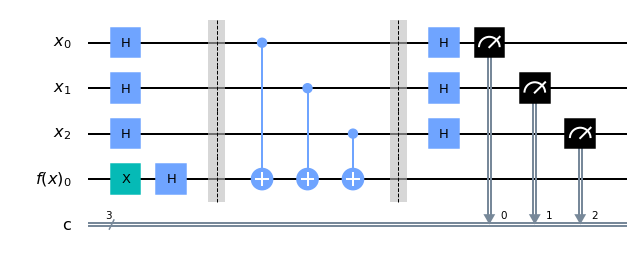

In [11]:
# Circuit for the balanced case
circtuit_Deutsch_Jozsa_balanced  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_balanced += circuit_Deutsch_Jozsa

# implementing the balanced function
circtuit_Deutsch_Jozsa_balanced.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[1], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[2], output_register[0])

# add a barrier
circtuit_Deutsch_Jozsa_balanced.barrier()

# final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.h(input_register)


# measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.measure(input_register, classical_register)

# draw the circuit
circtuit_Deutsch_Jozsa_balanced.draw(output="mpl")

In [12]:
# Alice uses is_balanced_or_constant() function
simulator = Aer.get_backend('qasm_simulator')
is_balanced_or_constant(circtuit_Deutsch_Jozsa_balanced, simulator)

The results of the measurements: {'111': 1}
The final result is: 111
Bob's chosen function was balanced
